In [ ]:
"""

Dotplot to reveal the relationship.

"""

In [1]:
import os, sys, glob
import numpy as np
import pandas as pd
import pyranges as pr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zmat = pd.read_csv('ctcf_rad21_zmat.txt', sep='\t')
zmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.017134,-1.079638,-0.213492,0.387380,-0.140657,0.525833,0.174746,1.046828,0.009519,0.768667,-0.263550,0.310812,0.798604,2.145546,-0.175323,0.425954,-1.616423,-2.087672
1,-1.120920,-1.072634,-0.056205,0.220502,0.070524,0.350351,0.471241,0.820880,0.245466,0.581706,-0.093672,0.156037,1.325473,1.823266,0.003724,0.257620,-1.943228,-2.040131
2,-1.092810,-0.959338,-0.004935,0.192637,0.118385,0.321009,0.561996,0.734967,0.319414,0.558116,-0.082978,0.062947,1.465700,1.719706,0.024289,0.141124,-2.023350,-2.056877
3,-1.073168,-0.893579,-0.025697,0.261649,0.080405,0.371520,0.446604,0.766119,0.255201,0.520460,-0.117619,0.154797,1.390609,1.827405,-0.035250,0.162757,-2.014595,-2.077618
4,-1.111680,-0.942127,-0.025648,0.218052,0.103872,0.396849,0.410850,0.799226,0.208403,0.595014,-0.138829,0.099305,1.372393,1.836427,0.004563,0.204385,-1.973765,-2.057290


In [3]:
zmat.shape

(20, 18)

In [11]:
# mean of zscore for each column
# exclude first two rows

zscore_mean = zmat.drop([0,1]).mean(axis=0)
print(zscore_mean)
len(zscore_mean)

0    -1.368144
1    -0.938824
2    -0.178413
3     0.272753
4    -0.051161
5     0.414272
6     0.297144
7     0.813718
8     0.081210
9     0.595826
10   -0.120825
11    0.283283
12    1.300598
13    1.875331
14    0.038441
15    0.459761
16   -1.984593
17   -1.790377
dtype: float64


18

In [5]:
# peak number

## load bed files
bedpath = '../data/bed/ctcf.rad21/'
bedfile = glob.glob(os.path.join(bedpath,'*.bed'))
peaknum = []
for b in bedfile:
    bed = pr.read_bed(b)
    peaknum.append(len(bed))

In [6]:
print(peaknum)
len(peaknum)

[70084, 82900, 87184, 101440, 97256, 92669, 151864, 86582, 51993]


9

In [7]:
peaknum = np.repeat(peaknum, 2)
peaknum

array([ 70084,  70084,  82900,  82900,  87184,  87184, 101440, 101440,
        97256,  97256,  92669,  92669, 151864, 151864,  86582,  86582,
        51993,  51993])

In [8]:
len(peaknum)
type(peaknum)

numpy.ndarray

In [58]:
#peaknum = peaknum.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [12]:
zscore_mean

0    -1.368144
1    -0.938824
2    -0.178413
3     0.272753
4    -0.051161
5     0.414272
6     0.297144
7     0.813718
8     0.081210
9     0.595826
10   -0.120825
11    0.283283
12    1.300598
13    1.875331
14    0.038441
15    0.459761
16   -1.984593
17   -1.790377
dtype: float64

<AxesSubplot:>

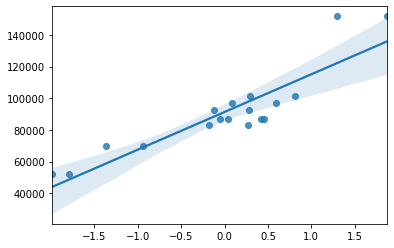

In [13]:
## plot

sns.regplot(x=zscore_mean, y=peaknum)

In [ ]:
for line in range(0,len(zscore_mean)):
     plt.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

In [15]:
zmat.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17'],
      dtype='object')